In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### ***Prepare Dataset of Envi Apple***

อ่านไฟล์ csv ของชุดข้อมูลตัวอย่างของ Envi

In [26]:
df_envi_inter = pd.read_csv("../../../DataSet/Envi/envi.csv")

In [27]:
df_envi_inter

,Date,Envi
0,04/01/2015,44562
1,11/01/2015,38112
2,18/01/2015,50355
3,25/01/2015,51922
4,01/02/2015,67496
...,...,...
164,25/02/2018,42116
165,04/03/2018,44454
166,11/03/2018,28399
167,18/03/2018,49145


In [28]:
df_envi_inter["Date"] = pd.to_datetime(df_envi_inter["Date"], format="%d/%m/%Y")

ทำนายวันถ้ดไปโดยใส่ค่าปริมาณของแอปเปิ้ลวันก่อนหน้า

In [29]:
df_envi_inter["y"] = df_envi_inter["Envi"].shift(-1)
df_envi_inter.dropna(inplace=True)
df_envi_inter

,Date,Envi,y
0,2015-01-04,44562,38112.0
1,2015-01-11,38112,50355.0
2,2015-01-18,50355,51922.0
3,2015-01-25,51922,67496.0
4,2015-02-01,67496,54229.0
...,...,...,...
163,2018-02-18,39773,42116.0
164,2018-02-25,42116,44454.0
165,2018-03-04,44454,28399.0
166,2018-03-11,28399,49145.0


In [30]:
# plt.scatter(df_envi_inter["Envi"], df_envi_inter["y"])
# plt.show()

In [31]:
x = np.array(df_envi_inter.drop(columns='y'))
y = np.array(df_envi_inter.drop(columns='Envi'))

# scaler = StandardScaler()
# scaler.fit(x.reshape(-1, 1))
# x = scaler.transform(x.reshape(-1, 1))
# scaler.fit(y.reshape(-1, 1))
# y = scaler.transform(y.reshape(-1, 1))


### ***Train Model Of Envi Apple***

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=113)

x_train = np.array(sorted(x_train, key=lambda x: x[0]))
x_test = np.array(sorted(x_test, key=lambda x: x[0]))
y_train = np.array(sorted(y_train, key=lambda x: x[0]))
y_test = np.array(sorted(y_test, key=lambda x: x[0]))

Baseline Predict

In [33]:
baseline_predict = x_test[:, 1:]

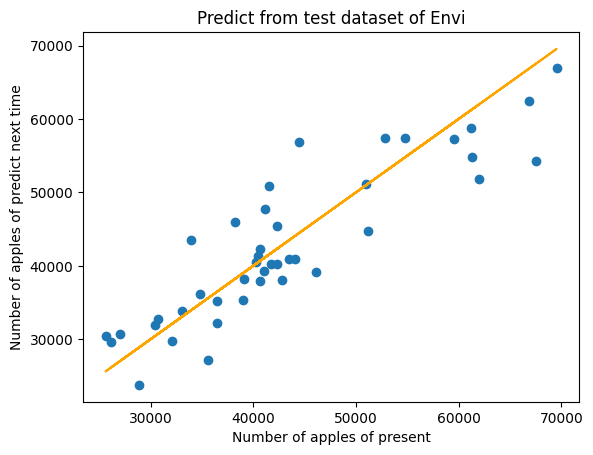

In [34]:

plt.scatter(x_test[:, 1:], y_test[:, 1:])
plt.plot(x_test[:, 1:], baseline_predict, color="orange")
plt.xlabel("Number of apples of present")
plt.ylabel("Number of apples of predict next time")
plt.title("Predict from test dataset of Envi")
plt.show()

In [35]:
def findBestBaseLine(r,t,x,y):
    a = 1000000
    index = 0
    for i in range(r,t):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i)
        if (buffer := mean_absolute_error(y_test[:,1:], x_test[:,1:])) < a:
            a = buffer
            index = i
    print(a, index)
    

findBestBaseLine(1,120,x,y)
# seed 113

4197.785714285715 113


### ***Predict from test_dataset Of Envi***

Mean Absolute Error: 4197.785714285715
Mean Square Error: 28053264.30952381
R2 score: 0.7401854053309418


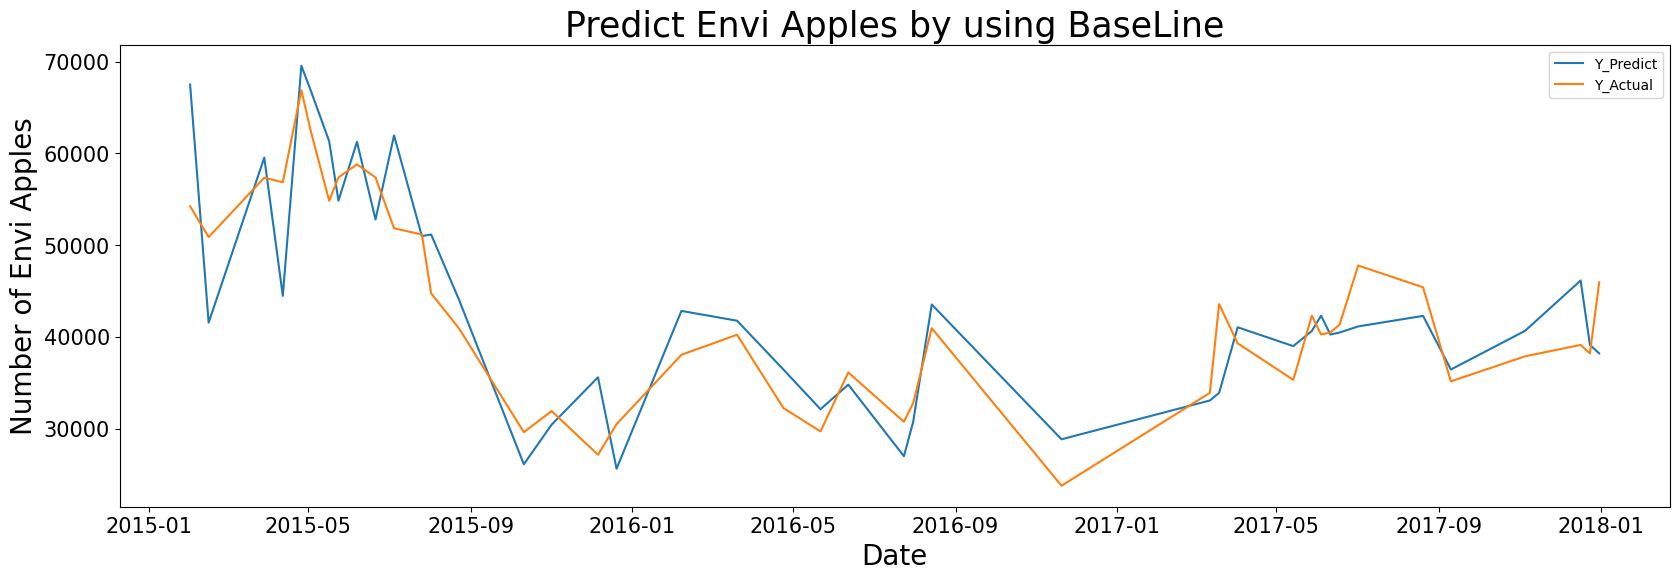

In [36]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test[:, 1:], baseline_predict)}")
print(f"Mean Square Error: {mean_squared_error(y_test[:, 1:], baseline_predict)}")
print(f"R2 score: {r2_score(y_test[:, 1:], baseline_predict)}")

plt.figure(figsize=(20, 6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(x_test[:, :1], baseline_predict, label="Y_Predict")
plt.plot(x_test[:,:1], y_test[:, 1:], label="Y_Actual")
plt.xlabel("Date", fontsize=20)
plt.ylabel("Number of Envi Apples", fontsize=20)
plt.title("Predict Envi Apples by using BaseLine", fontsize=25)
plt.legend()
plt.show()